In [ ]:
try:
    # This command is specific to Google Colab to ensure the use of TensorFlow version 2.x.
    %tensorflow_version 2.x
except Exception:
    pass

# Import TensorFlow library
import tensorflow as tf

# Import specific modules and classes from TensorFlow Keras API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy

# Import additional libraries
import os  # for operating system dependent functionality
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for plotting graphs and visualizations


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Download the dataset (cats and dogs) from the provided URL
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

# Unzip the downloaded dataset
!unzip cats_and_dogs.zip

# Define the path to the dataset directory
PATH = 'cats_and_dogs'

# Set up directories for training, validation, and test data
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Count the number of files in each directory
# The train and validation directories each have subdirectories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150


Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [ ]:
# Create ImageDataGenerator instances for training, validation, and test data
# The rescale parameter rescales the pixel values from range [0, 255] to [0, 1]
train_image_generator = ImageDataGenerator(rescale=1/255)
validation_image_generator = ImageDataGenerator(rescale=1/255)
test_image_generator = ImageDataGenerator(rescale=1/255)

# Generate batches of augmented image data from the training directory
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'  # Since it's a binary classification problem (cats vs. dogs)
)

# Generate batches of augmented image data from the validation directory
val_data_gen = validation_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'  # Binary classification
)

# Generate batches of image data from the test directory
# Note: `class_mode="input"` means that the data is returned without any labels
test_data_gen = test_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=PATH,
    classes=['test'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode="input",  # Test data does not have labels
    shuffle=False  # Ensures that the order of images is preserved
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


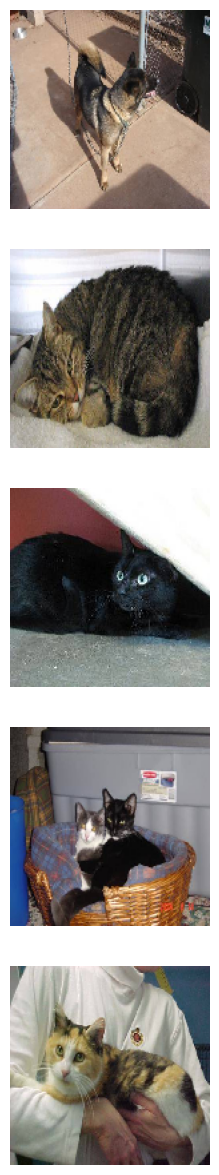

In [ ]:
# Define a function to plot images
def plotImages(images_arr, probabilities=False):
    # Create a subplot for each image
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5, len(images_arr) * 3))

    # If no probabilities are provided, simply plot the images
    if probabilities is False:
        for img, ax in zip(images_arr, axes):
            ax.imshow(img)
            ax.axis('off')
    else:
        # If probabilities are provided, plot the images with titles showing the predicted class
        for img, probability, ax in zip(images_arr, probabilities, axes):
            ax.imshow(img)
            ax.axis('off')
            if probability > 0.5:
                ax.set_title("%.2f" % (probability * 100) + "% dog")
            else:
                ax.set_title("%.2f" % ((1 - probability) * 100) + "% cat")

    # Display the plot
    plt.show()

# Generate a batch of images from the training data
sample_training_images, _ = next(train_data_gen)

# Plot the first 5 images from the generated batch
plotImages(sample_training_images[:5])



In [ ]:
# Create an ImageDataGenerator instance for training data with data augmentation
train_image_generator = ImageDataGenerator(
    rescale=1/255,  # Normalize the pixel values to the range [0, 1]
    fill_mode="nearest",  # Strategy to fill in newly created pixels
    horizontal_flip=True,  # Randomly flip inputs horizontally
    vertical_flip=True,  # Randomly flip inputs vertically
    width_shift_range=0.3,  # Randomly shift inputs horizontally by a fraction of the total width
    height_shift_range=0.3,  # Randomly shift inputs vertically by a fraction of the total height
    zoom_range=0.25,  # Randomly zoom into images
    shear_range=0.25  # Randomly shear the images
)



Found 2000 images belonging to 2 classes.


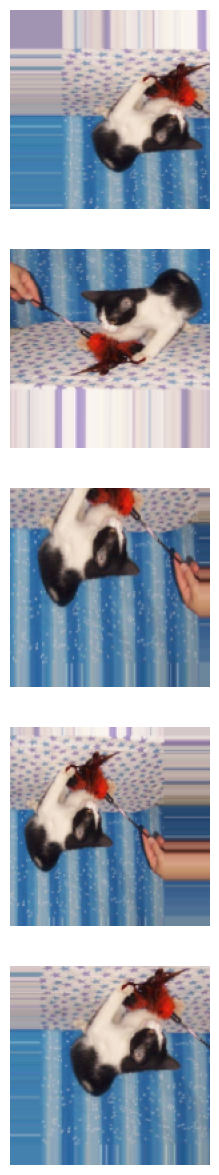

In [ ]:
# Generate batches of augmented image data from the training directory
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,  # Number of images per batch
    directory=train_dir,  # Path to the training data directory
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Dimensions to which all images will be resized
    class_mode='binary'  # Since it's a binary classification problem (cats vs. dogs)
)

# Generate a list of 5 augmented images from the first batch of training data
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# Plot the augmented images
plotImages(augmented_images)


In [ ]:
# Create a Sequential model
model = Sequential()

# Add a convolutional layer with 32 filters, a 3x3 kernel, ReLU activation, and an input shape of (150, 150, 3)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2,2)))

# Add a convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(64, (3, 3), activation='relu'))
# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2,2)))

# Add a convolutional layer with 128 filters, a 3x3 kernel, and ReLU activation
model.add(Conv2D(128, (3, 3), activation='relu'))
# Add a max pooling layer with a 2x2 pool size
model.add(MaxPooling2D((2,2)))

# Flatten the input to a 1D vector
model.add(Flatten())

# Add a dense (fully connected) layer with 64 units
model.add(Dense(64))

# Add a dense (fully connected) output layer with 2 units (for two classes: cat and dog)
model.add(Dense(2))

# Compile the model
# Use the Adam optimizer, accuracy as the metric, and sparse categorical crossentropy loss
model.compile(optimizer='adam', metrics=['accuracy'], loss=SparseCategoricalCrossentropy(from_logits=True))

# Print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
total_train//batch_size, total_val//batch_size, total_train, total_val, batch_size

(15, 7, 2001, 1001, 128)

In [ ]:
# 8
# train_data_gen /= 255
# validation_data /= 255
history = model.fit(
    train_data_gen,  # Training data generator
    steps_per_epoch=total_train // batch_size,  # Number of batches to yield from the generator in each epoch
    epochs=epochs,  # Number of epochs to train the model
    validation_data=val_data_gen,  # Validation data generator
    validation_steps=total_val // batch_size,  # Number of batches to yield from the validation generator in each epoch
    verbose=1  # Verbosity mode (1: progress bar, 0: silent)
)


Epoch 1/20
15/15 [==============================] - 115s 8s/step - loss: 0.8414 - accuracy: 0.5144 - val_loss: 0.7079 - val_accuracy: 0.5022
Epoch 2/20
15/15 [==============================] - 102s 7s/step - loss: 0.6917 - accuracy: 0.5230 - val_loss: 0.6877 - val_accuracy: 0.5324
Epoch 3/20
15/15 [==============================] - 100s 7s/step - loss: 0.6873 - accuracy: 0.5475 - val_loss: 0.7001 - val_accuracy: 0.5045
Epoch 4/20
15/15 [==============================] - 119s 8s/step - loss: 0.6742 - accuracy: 0.5630 - val_loss: 0.6535 - val_accuracy: 0.5837
Epoch 5/20
15/15 [==============================] - 111s 8s/step - loss: 0.6681 - accuracy: 0.5694 - val_loss: 0.6728 - val_accuracy: 0.6083
Epoch 6/20
15/15 [==============================] - 114s 8s/step - loss: 0.6683 - accuracy: 0.5881 - val_loss: 0.6526 - val_accuracy: 0.6049
Epoch 7/20
15/15 [==============================] - 108s 7s/step - loss: 0.6542 - accuracy: 0.6095 - val_loss: 0.6447 - val_accuracy: 0.6172
Epoch 8/20
15

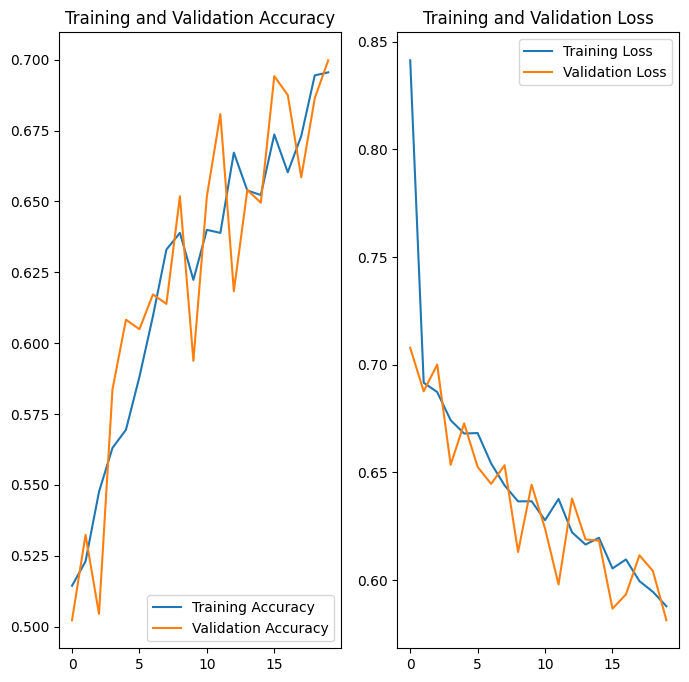

In [ ]:
# 9
#visualizes the training and validation metrics (accuracy and loss) over the epochs.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 1s 1s/step


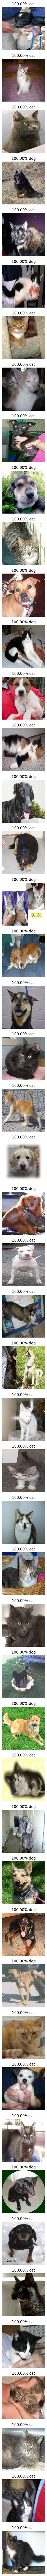

In [ ]:
test_images, _ = next(test_data_gen)
# print(test_images,_)
probabilities = np.argmax(model.predict(test_data_gen), axis=-1)
# print(model.predict(test_data_gen))
plotImages(test_images, probabilities=probabilities)

In [ ]:
#Here we evaluates the model's performance against a predefined set of answers (answers) and checks if the model correctly identifies at least 63% of the images.
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
